 ![SegmentLocal](KNN_decision_surface_animation.gif "segment")    

 
 `From Wikipedia`
 

## K Nearest Neighbor (KNN)  

- If the specified functional form is far from the truth, and prediction accuracy is our goal, then the `parametric method` (Logisitic, LDA, Naive Bayes etc.) will perform poorly.
- `Non-parametric` methods do not explicitly assume a parametric form for f(X), and thereby provide an alternative and more flexible approach for performing regression
- `K-nearest neighbors (KNN)` regression/classification is an example of non-parametric method
- For given K and a point $x_0$,
  1. Identify K nearest point to $x_0$ from training data, say $\mathcal{N_0}$ = set of K training points which are closest to $x_0$
  2. In regression case prediction </br>
      $\hat{f}(x_0) = \frac{1}{K}\sum_{x_i \in \mathcal{N_0}} y_i$
  3. For classification case </br>
     Assign the label of majority class

- What is the training error for 1-NN?

In [1]:
## Example - Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-5, 5, 50)
y = x ** 2 + 3.5 * x - 10 
df  = pd.DataFrame({'x': x, 'y': y})
print(df.head())
print(df.tail())

          x         y
0 -5.000000 -2.500000
1 -4.795918 -3.784881
2 -4.591837 -4.986464
3 -4.387755 -6.104748
4 -4.183673 -7.139733
           x          y
45  4.183673  22.145981
46  4.387755  24.609538
47  4.591837  27.156393
48  4.795918  29.786547
49  5.000000  32.500000


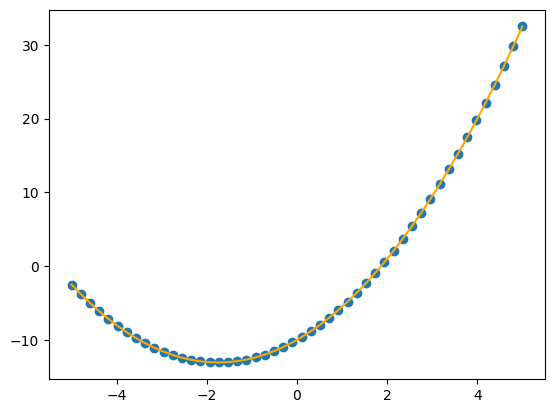

In [3]:
plt.scatter(x, y)
plt.plot(x, x ** 2 + 3.5 * x - 10, color = 'orange')
plt.show()

In [4]:
## what is y when x = 4.6 using 1-NN
## what is y when x = 4.6 using 2-NN
## what is y when x = 4.6 using 3-NN


47
27.15639316951271


In [5]:
## Using 2-NN

28.471470220741363

In [6]:
## Using 3-NN

## Actual y is
print(4.6 ** 2 + 3.5 * 4.6 - 10)

[47 48 46]
           x          y
47  4.591837  27.156393
48  4.795918  29.786547
46  4.387755  24.609538
27.184159378036934
27.25999999999999


In [7]:
df = pd.read_csv(r'iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
## what is variety when sepal (length = 5.32, width = 3.78) and petal (length = 5.5, width = 1.22)
## using 1 - NN and Euclidean Distance (L2)
dist = (df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']] - np.array([5.32, 3.78, 5.5, 1.22])) ** 2
dist = dist.sum(axis = 1) ** .5
index = dist.argmin()
index

149

In [9]:
df.iloc[149]['variety']

'Virginica'

In [10]:
index = np.argpartition(dist, 2)[:2]
print(index)
print(df.iloc[index]['variety'])

[149  70]
149     Virginica
70     Versicolor
Name: variety, dtype: object


In [11]:
index = np.argpartition(dist, 7)[:7]
print(index)
print(df.iloc[index]['variety'])

[ 66  84  85 149  70 138 127]
66     Versicolor
84     Versicolor
85     Versicolor
149     Virginica
70     Versicolor
138     Virginica
127     Virginica
Name: variety, dtype: object


## Points to remember
- Training accuracy for 1-NN is always zero
- KNN is a non-parametric method and hence requires a lot of data to get better result  
- In-order to calculate the distance between 2 points (observations), L1 or L2 distance can be used
  </br> `L2` or `Euclidean distance` between p and q is d(p, q) = $\sqrt{(p_1-q_1) ^ 2 + (p_2-q_2) ^ 2 + ... + (p_n-q_n) ^ 2)}$
  </br> `L1` or `Manhattan distance` between p and q is d(p, q) = $|p_1-q_1|  + |p_2-q_2| + ... + |p_n-q_n|$
- k is treated as hyperameter and the best k is selected by hyperparameter optimization
- A variant of KNN is weighted KNN where weight's $w_i$ = $\frac{1}{d_i}$, $d_i$ is the distance
- KNN is lazy in the sense that we don't do anything during training. It takes up more memory and data storage compared to other classifiers
- KNN is prone to overfitting  

## Performance of different models 

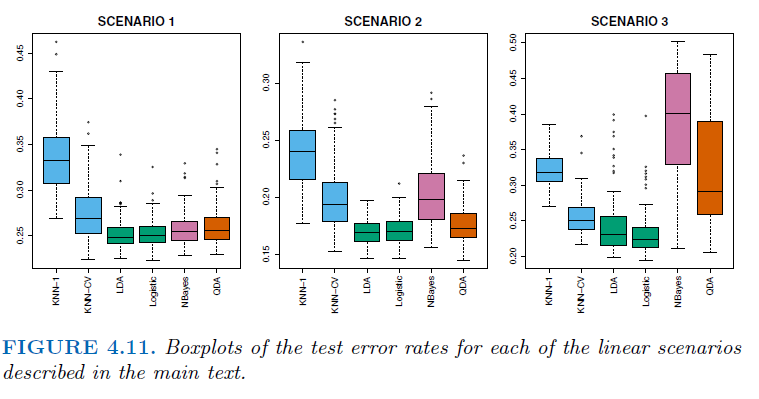

`Scenario 1`: There were 20 training observations in each of two classes. The observations within each class were uncorrelated random normal variables with a different mean in each class  

`Scenario 2`: Details are as in Scenario 1, except that within each class, the two predictors had a correlation of −0.5      

`Scenario 3`: As in the previous scenario, there is substantial negative correlation between the predictors within each class. However, this time we generated X1 and X2 from the t-distribution, with 50 observations per class. The t-distribution has a similar shape to the normal distribution, but it has a tendency to yield more extreme points   



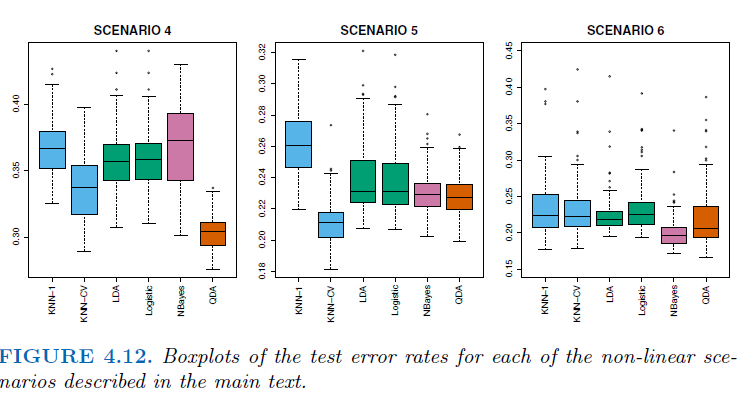    


`Scenario 4`: The data were generated from a normal distribution, with a correlation of 0.5 between the predictors in the first class, and correlation of −0.5 between the predictors in the second class   

`Scenario 5`: The data were generated from a normal distribution with uncorrelated predictors. Then the responses were sampled from the logistic function applied to a complicated non-linear function of the predictors    

`Scenario 6`: The observations were generated from a normal distribution
with a different diagonal covariance matrix for each class. However, the
sample size was very small: just n = 6 in each class

## Question 

> Suppose that we take a data set, divide it into equally-sized training and
> test sets, and then try out two different classification procedures. First we
> use logistic regression and get an error rate of 20% on the training data and
> 30% on the test data. Next we use 1-nearest neighbors (i.e. $K = 1$) and get
> an average error rate (averaged over both test and training data sets) of
> 18%. Based on these results, which method should we prefer to use for
> classification of new observations? Why?

## Question   
In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.    

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
function. Note you may find it helpful to use the data.frame()
function to create a single data set containing both mpg01 and
the other Auto variables.    

(b) Explore the data graphically in order to investigate the association
between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots
and boxplots may be useful tools to answer this question.
Describe your findings.    

(c) Split the data into a training set and a test set.    

(d) Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in    
(b). What is the test error of the model obtained?   

(e) Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?    

(f) Perform logistic regression on the training data in order to predict
mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?    

(g) Perform naive Bayes on the training data in order to predict
mpg01 using the variables that seemed most associated with mpg01
in (b). What is the test error of the model obtained?     

(h) Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?